Yash Part 

In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from collections import Counter

data_games = pd.read_csv("data_ord.csv")
data_cards = pd.read_csv("cardlist.csv")

Mapping card elixir cost to card id and setting to a new dataframe 

In [4]:
games_but_elixir = data_games.copy(deep=True)
temp_outcome_column = data_games["outcome"]
just_cards = games_but_elixir.drop(columns=["outcome","Unnamed: 0","p1trophies","p2trophies"])
column_names = (just_cards.columns).to_numpy()
for cards in column_names: 
    games_but_elixir[cards] = games_but_elixir[cards].apply(lambda x:(data_cards.at[x,'cost']))

In [5]:
games_but_elixir.head()

,Unnamed: 0,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome
0,0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,3.0,2.0,2.0,5.0,4.0,4.0,2.0,7578,7597,1
1,1,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,3.0,4.0,5.0,2.0,7548,7551,1
2,2,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,5.0,3.0,3.0,5.0,4.0,4.0,2.0,7518,7523,1
3,3,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,9.0,2.0,6.0,3.0,3.0,6.0,2.0,1.0,7485,7523,1
4,4,3.0,1.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,5.0,3.0,7.0,4.0,6.0,2.0,3.0,7126,7114,1


Computes Average deck elixir cost for each player and adds to the elixir dataframe

In [6]:
games_but_elixir['Average_deck_elixir_cost_player1'] = games_but_elixir.iloc[:, 1:9].mean(axis=1)
games_but_elixir['Average_deck_elixir_cost_player2'] = games_but_elixir.iloc[:, 9:17].mean(axis=1)

games_but_elixir.head()

,Unnamed: 0,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,...,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome,Average_deck_elixir_cost_player1,Average_deck_elixir_cost_player2
0,0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,2.0,5.0,4.0,4.0,2.0,7578,7597,1,4.250,3.250
1,1,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,3.0,3.0,4.0,5.0,2.0,7548,7551,1,4.250,3.750
2,2,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,...,3.0,5.0,4.0,4.0,2.0,7518,7523,1,4.250,3.500
3,3,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,9.0,...,3.0,3.0,6.0,2.0,1.0,7485,7523,1,4.250,4.000
4,4,3.0,1.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,...,7.0,4.0,6.0,2.0,3.0,7126,7114,1,3.125,4.125


In [7]:
average_deck_elixir_cost_1 = games_but_elixir["Average_deck_elixir_cost_player1"].mean()
average_deck_elixir_cost_2 = games_but_elixir["Average_deck_elixir_cost_player2"].mean()
average_deck_elixir_cost = (average_deck_elixir_cost_1+average_deck_elixir_cost_2)/2
print(average_deck_elixir_cost)

3.7149177686030885


Adding a column to tell which player lost 

In [8]:
games_but_elixir["lost"] = games_but_elixir["outcome"].apply(lambda outs: 2 if outs == 1 else 1)
games_but_elixir

,Unnamed: 0,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,...,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome,Average_deck_elixir_cost_player1,Average_deck_elixir_cost_player2,lost
0,0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,4.0,2.0,7578,7597,1,4.250,3.250,2
1,1,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,3.0,4.0,5.0,2.0,7548,7551,1,4.250,3.750,2
2,2,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,...,5.0,4.0,4.0,2.0,7518,7523,1,4.250,3.500,2
3,3,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,9.0,...,3.0,6.0,2.0,1.0,7485,7523,1,4.250,4.000,2
4,4,3.0,1.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,...,4.0,6.0,2.0,3.0,7126,7114,1,3.125,4.125,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718881,718881,4.0,4.0,3.0,4.0,2.0,7.0,4.0,2.0,3.0,...,6.0,3.0,4.0,0.0,5817,5458,1,3.750,3.750,2
718882,718882,4.0,4.0,3.0,4.0,2.0,7.0,4.0,2.0,5.0,...,6.0,6.0,4.0,2.0,5817,5577,2,3.750,4.500,1
718883,718883,4.0,4.0,3.0,4.0,2.0,7.0,4.0,2.0,2.0,...,4.0,7.0,2.0,3.0,5817,6087,2,3.750,3.875,1
718884,718884,4.0,4.0,3.0,4.0,2.0,7.0,4.0,2.0,4.0,...,5.0,5.0,2.0,2.0,5844,5838,2,3.750,4.125,1


Getting the average elixir cost for winning decks and for losing decks

In [9]:
winning_avg_1 = games_but_elixir.loc[games_but_elixir["outcome"] == 1, "Average_deck_elixir_cost_player1"].mean()
winning_avg_2 = games_but_elixir.loc[games_but_elixir["outcome"] == 2, "Average_deck_elixir_cost_player2"].mean()
average_elixir_cost_for_winning_decks = (winning_avg_1+winning_avg_2)/2
print("AVG winning deck elixir cost: ",average_elixir_cost_for_winning_decks)

losing_avg_1 = games_but_elixir.loc[games_but_elixir["lost"] == 1, "Average_deck_elixir_cost_player1"].mean()
losing_avg_2 = games_but_elixir.loc[games_but_elixir["lost"] == 2, "Average_deck_elixir_cost_player2"].mean()
average_elixir_cost_for_losing_decks = (losing_avg_1+losing_avg_2)/2
print("AVG losing deck elixir cost: ", average_elixir_cost_for_losing_decks)

AVG winning deck elixir cost:  3.7197653180057424
AVG losing deck elixir cost:  3.709879073083825


Getting averages by deck 

In [13]:
# Deck Section
# Extracting interesting deck data
dict_decks_general = {} 
dict_decks_general = defaultdict(lambda:0,dict_decks_general)
dict_decks_winning_only = {} 
dict_decks_winning_only = defaultdict(lambda:0,dict_decks_winning_only)
def get_decks(p1_deck,p2_deck,result):
    global dict_decks_general
    global dict_decks_winning_only
    dict_decks_general[p1_deck] = dict_decks_general[p1_deck] + 1
    dict_decks_general[p2_deck] = dict_decks_general[p2_deck] + 1
    if(result == 1):
        dict_decks_winning_only[p1_deck] = dict_decks_winning_only[p1_deck] + 1
    else:
        dict_decks_winning_only[p2_deck] = dict_decks_winning_only[p2_deck] + 1
        
data_games.apply(lambda x: get_decks((x["p1card1"],x["p1card2"],x["p1card3"],x["p1card4"],x["p1card5"],x["p1card6"],x["p1card7"],x["p1card8"]),(x["p2card1"],x["p2card2"],x["p2card3"],x["p2card4"],x["p2card5"],x["p2card6"],x["p2card7"],x["p2card8"]),x["outcome"]), axis=1)

data_decks = pd.DataFrame.from_dict([dict_decks_general]).transpose().reset_index().rename(columns={"index": "Deck", 0: "Occurrences"})
data_decks['Wins'] = data_decks['Deck'].apply(lambda x: dict_decks_winning_only[x])
data_decks

In [17]:
# Deck Section
# Extracting interesting deck data
dict_decks_general = {} # All decks and how many times they were found
dict_decks_general = defaultdict(lambda:0,dict_decks_general) # zero filled dictionary
dict_decks_winning_only = {} # All decks that won a game, and how many times they won
dict_decks_winning_only = defaultdict(lambda:0,dict_decks_winning_only) # zero filled dictionary

dict_decks_trophies = {}
dict_decks_trophies = defaultdict(lambda:0,dict_decks_trophies) # zero filled dictionary


# function to obtain deck info
# Takes in the player 1 and player 2 decks and the outcome of the match
def get_decks(p1_deck,p2_deck,p1_trophies,p2_trophies,result):
    global dict_decks_general
    global dict_decks_winning_only
    global dict_decks_trophies
    dict_decks_general[p1_deck] = dict_decks_general[p1_deck] + 1 # add 1 to player 1's deck occurrences
    dict_decks_general[p2_deck] = dict_decks_general[p2_deck] + 1 # add 1 to player 2's deck occurrences
    dict_decks_trophies[p1_deck] = dict_decks_trophies[p1_deck] + p1_trophies
    dict_decks_trophies[p2_deck] = dict_decks_trophies[p2_deck] + p2_trophies
    if(result == 1):
        dict_decks_winning_only[p1_deck] = dict_decks_winning_only[p1_deck] + 1 # if player 1 wins add 1 to player 1's deck occurrences for winning decks
    else:
        dict_decks_winning_only[p2_deck] = dict_decks_winning_only[p2_deck] + 1 # if player 2 wins add 1 to player 2's deck occurrences for winning decks

# apply function to data_frame containing games
data_games.apply(lambda x: get_decks((x["p1card1"],x["p1card2"],x["p1card3"],x["p1card4"],x["p1card5"],x["p1card6"],x["p1card7"],x["p1card8"]),(x["p2card1"],x["p2card2"],x["p2card3"],x["p2card4"],x["p2card5"],x["p2card6"],x["p2card7"],x["p2card8"]),x["p1trophies"],x["p2trophies"],x["outcome"]), axis=1)

# create new dataframe containing information found
# has the columns 'Deck', 'Occurrences', and 'Wins'
data_decks = pd.DataFrame.from_dict([dict_decks_general]).transpose().reset_index().rename(columns={"index": "Deck", 0: "Occurrences"})
data_decks['Wins'] = data_decks['Deck'].apply(lambda x: dict_decks_winning_only[x])
data_decks['Trophies'] = dict_decks_trophies.values()
data_decks['Trophies'] = data_decks['Trophies']/data_decks['Occurrences']
data_decks.head()

,Deck,Occurrences,Wins,Trophies
0,"(8, 34, 37, 52, 69, 88, 92, 97)",30,17,6963.566667
1,"(11, 12, 13, 58, 77, 86, 87, 98)",22,9,7339.909091
2,"(11, 37, 53, 83, 88, 92, 97, 102)",183,83,6996.245902
3,"(19, 22, 25, 32, 54, 76, 87, 98)",1778,959,6912.115861
4,"(28, 38, 43, 46, 50, 81, 102, 103)",1910,1064,6769.385864


In [18]:
# Obtain deck specific info
comps = []
rarities = []
costs = []
def findComp(deck):
    global comps
    global rarities
    comp = 0
    rarity = 0
    total = 0
    for card in deck:
        curr_type = data_cards.loc[card].type
        curr_rarity = data_cards.loc[card].rarity
        total += data_cards.loc[card].cost
        if(curr_type == "unit"):
            comp += 1
        elif(curr_type == "spell"):
            comp += 10
        elif(curr_type == "defense" or curr_type == "spawner" or curr_type == "siege" or curr_type == "building"):
            comp += 100
        
        if(curr_rarity == "common"):
            rarity += 1
        elif(curr_rarity == "rare"):
            rarity += 10
        elif(curr_rarity == "epic"):
            rarity += 100
        elif(curr_rarity == "legendary"):
            rarity += 1000
        elif(curr_rarity == "champion"):
            rarity += 10000
    comps.append(str(comp).zfill(3))
    rarities.append(str(rarity).zfill(5))
    costs.append(total/8)
    
    
data_decks['Deck'].apply(lambda x: findComp(x))
data_decks['Rarity'] = rarities
data_decks['Composition'] = comps
data_decks['Costs'] = costs
data_decks['Win Rate'] = data_decks.apply(lambda x: x['Wins']/x['Occurrences'], axis=1)
data_decks.head()

,Deck,Occurrences,Wins,Trophies,Rarity,Composition,Costs,Win Rate
0,"(8, 34, 37, 52, 69, 88, 92, 97)",30,17,6963.566667,12212,035,4.25,0.566667
1,"(11, 12, 13, 58, 77, 86, 87, 98)",22,9,7339.909091,01331,224,3.25,0.409091
2,"(11, 37, 53, 83, 88, 92, 97, 102)",183,83,6996.245902,02213,143,3.75,0.453552
3,"(19, 22, 25, 32, 54, 76, 87, 98)",1778,959,6912.115861,02213,125,3.50,0.539370
4,"(28, 38, 43, 46, 50, 81, 102, 103)",1910,1064,6769.385864,02141,116,4.00,0.557068


In [19]:
elixir_analysis = data_decks.copy(deep=True)

elixir_analysis['losses'] = elixir_analysis['Occurrences'] -elixir_analysis['Wins']

elixir_analysis = elixir_analysis[['Deck','Occurrences','Wins','losses','Rarity','Composition','Costs','Trophies','Win Rate']]


elixir_analysis.rename(columns={'Costs':'Average Elixir Cost'},inplace = True)
elixir_analysis

,Deck,Occurrences,Wins,losses,Rarity,Composition,Average Elixir Cost,Trophies,Win Rate
0,"(8, 34, 37, 52, 69, 88, 92, 97)",30,17,13,12212,035,4.250,6963.566667,0.566667
1,"(11, 12, 13, 58, 77, 86, 87, 98)",22,9,13,01331,224,3.250,7339.909091,0.409091
2,"(11, 37, 53, 83, 88, 92, 97, 102)",183,83,100,02213,143,3.750,6996.245902,0.453552
3,"(19, 22, 25, 32, 54, 76, 87, 98)",1778,959,819,02213,125,3.500,6912.115861,0.539370
4,"(28, 38, 43, 46, 50, 81, 102, 103)",1910,1064,846,02141,116,4.000,6769.385864,0.557068
...,...,...,...,...,...,...,...,...,...
327653,"(7, 15, 17, 21, 43, 81, 87, 89)",1,1,0,00341,125,4.500,5577.000000,1.000000
327654,"(13, 35, 39, 43, 48, 73, 95, 99)",1,1,0,02213,026,3.875,6087.000000,1.000000
327655,"(11, 17, 18, 24, 51, 77, 95, 102)",1,1,0,01142,125,4.125,5838.000000,1.000000
327656,"(4, 7, 11, 21, 64, 77, 88, 92)",1,0,1,00332,125,4.375,5858.000000,0.000000


Deck elixir cost versus Winrate scatterplot

In [1]:
plt.figure().set_figwidth(8)
sns.scatterplot(elixir_analysis, x ='Average Elixir Cost', y = 'Win Rate')


NameError: name 'plt' is not defined

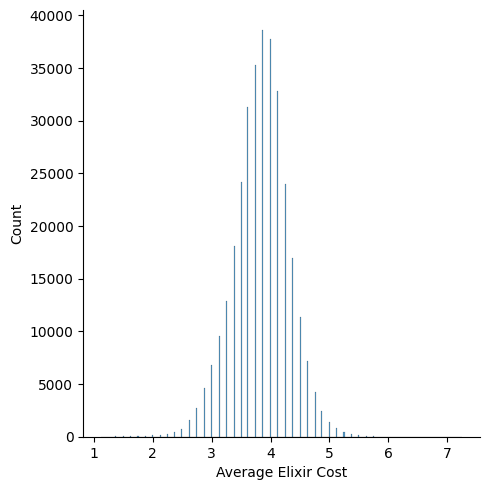

In [21]:
elixir_analysis

sns.displot(elixir_analysis, x ='Average Elixir Cost')

30.0
8264.0
6140.412407816404


<Figure size 800x480 with 0 Axes>

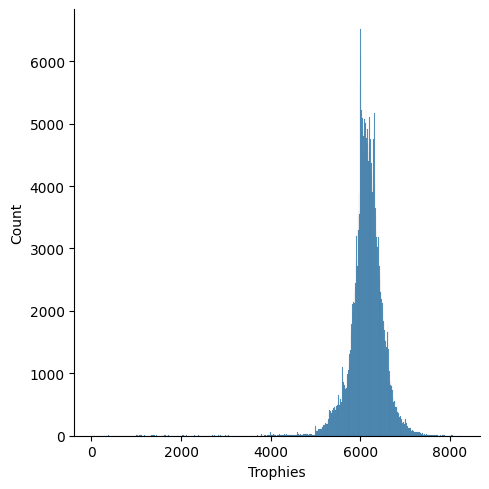

In [22]:
print(elixir_analysis['Trophies'].min())
print(elixir_analysis['Trophies'].max())
print(elixir_analysis['Trophies'].mean())

plt.figure().set_figwidth(8)
sns.displot(elixir_analysis, x ='Trophies')


Average Elixir Cost vs trophies binned 

In [23]:
bins = [5000,5500,6000,6500,7000,7500,8500]
label = ['5000-5500','6000-6500','6500-7000','7000-7500','7500-8000','8000-8500']
elixir_analysis['bins'] = pd.cut(elixir_analysis['Trophies'],bins=bins,labels=label)
elixir_analysis

,Deck,Occurrences,Wins,losses,Rarity,Composition,Average Elixir Cost,Trophies,Win Rate,bins
0,"(8, 34, 37, 52, 69, 88, 92, 97)",30,17,13,12212,035,4.250,6963.566667,0.566667,7000-7500
1,"(11, 12, 13, 58, 77, 86, 87, 98)",22,9,13,01331,224,3.250,7339.909091,0.409091,7500-8000
2,"(11, 37, 53, 83, 88, 92, 97, 102)",183,83,100,02213,143,3.750,6996.245902,0.453552,7000-7500
3,"(19, 22, 25, 32, 54, 76, 87, 98)",1778,959,819,02213,125,3.500,6912.115861,0.539370,7000-7500
4,"(28, 38, 43, 46, 50, 81, 102, 103)",1910,1064,846,02141,116,4.000,6769.385864,0.557068,7000-7500
...,...,...,...,...,...,...,...,...,...,...
327653,"(7, 15, 17, 21, 43, 81, 87, 89)",1,1,0,00341,125,4.500,5577.000000,1.000000,6000-6500
327654,"(13, 35, 39, 43, 48, 73, 95, 99)",1,1,0,02213,026,3.875,6087.000000,1.000000,6500-7000
327655,"(11, 17, 18, 24, 51, 77, 95, 102)",1,1,0,01142,125,4.125,5838.000000,1.000000,6000-6500
327656,"(4, 7, 11, 21, 64, 77, 88, 92)",1,0,1,00332,125,4.375,5858.000000,0.000000,6000-6500


/var/folders/d3/r8knfdhd21v56_0frl6_ycl00000gn/T/ipykernel_19473/4229477530.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


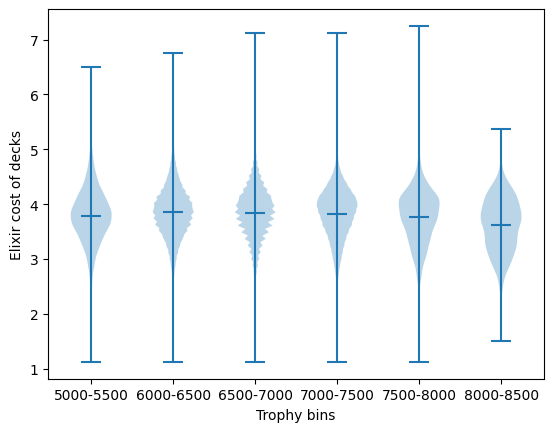

In [24]:



# getting continents and correspsonding residual
bined = [1,2,3,4,5,6]
avg_elixir = []
elixir_analysis.groupby("bins").apply(lambda x: avg_elixir.append(x["Average Elixir Cost"]))

# Constructing the plot
fig, ax = plt.subplots()
ax.violinplot(avg_elixir,bined,showmeans=True)
# setting labels and title
ax.set_xlabel("Trophy bins")
ax.set_ylabel("Elixir cost of decks")

ax.set_xticks(bined)
ax.set_xticklabels(['5000-5500','6000-6500','6500-7000','7000-7500','7500-8000','8000-8500'])
fig.show()



Hypothesis testing 

Hypothesis: There is no correlation between deck average elixir cost and winrate.

In [25]:
from collections import defaultdict
from collections import Counter
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [29]:
win_rate_eli = elixir_analysis['Win Rate']
units_eli = elixir_analysis['Average Elixir Cost']

corr, p = pearsonr(win_rate_eli, units_eli)

print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation pval: %e' % p)

Pearsons correlation: 0.011
Pearsons correlation pval: 1.022831e-09


This illustrates that there is a weak correlation between win rate and deck elixir cost with a high certainty.   

Extra conclusions 

<AxesSubplot: xlabel='Average Elixir Cost', ylabel='Trophies'>

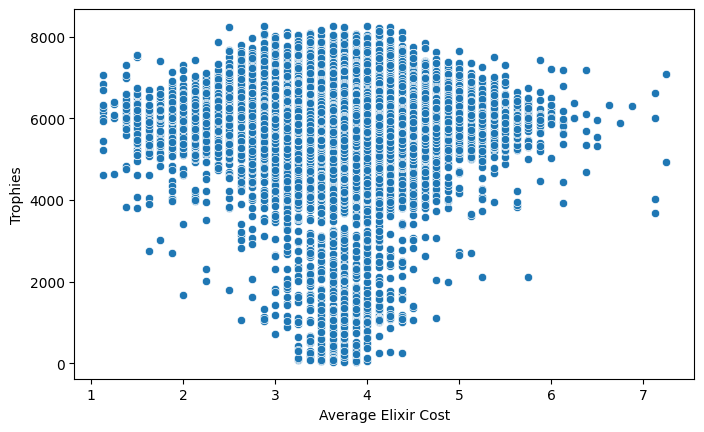

In [30]:
plt.figure().set_figwidth(8)
sns.scatterplot(elixir_analysis, x ='Average Elixir Cost', y = 'Trophies')

Using SVM to predict outcome given deck information

In [40]:
# code for training sets 
from sklearn.model_selection import train_test_split
attempting = data_games.copy(deep=True)
attempting

X_x = attempting.drop(["outcome",'p1trophies', 'p2trophies','Unnamed: 0'],axis = 1)
Y_y = attempting["outcome"]

X_train, X_test, Y_train, Y_test = train_test_split(X_x, Y_y, test_size = 0.25, random_state = 42)

In [41]:
from sklearn import svm

# creating a SVM model using training set
svm_model = svm.SVC(kernel="linear")
svm_model.fit(X_train,Y_train)

# Predicted values
run_svm = svm_model.predict(X_test)

In [ ]:
# holdout validation
result_svm = svm_model.score(X_test,Y_test)

print("Accuracy of Linear Support vector machine: %.2f%%" % (result_svm*100.0))
